# **Decision Tree**

# **1. Data Preparation:**

In [301]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [302]:
import pandas as pd

# Load the dataset from an Excel file
data = pd.read_excel('heart_disease.xlsx')

# Display the first few rows of the dataset
print(data.head())


        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [303]:
# If you have multiple sheets and want to load a specific one
data = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')


In [304]:
pip install openpyxl


In [305]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


# **2. Exploratory Data Analysis (EDA):**

**Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values**

In [306]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None


In [307]:
# Checking for missing values
print(data.isnull().sum())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [308]:

# Checking for statistical summary
print(data.describe())


              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


In [309]:
# Check column names and data types
print(data.dtypes)


age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object


In [310]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


**Outliers, and inconsistencies in the data.**

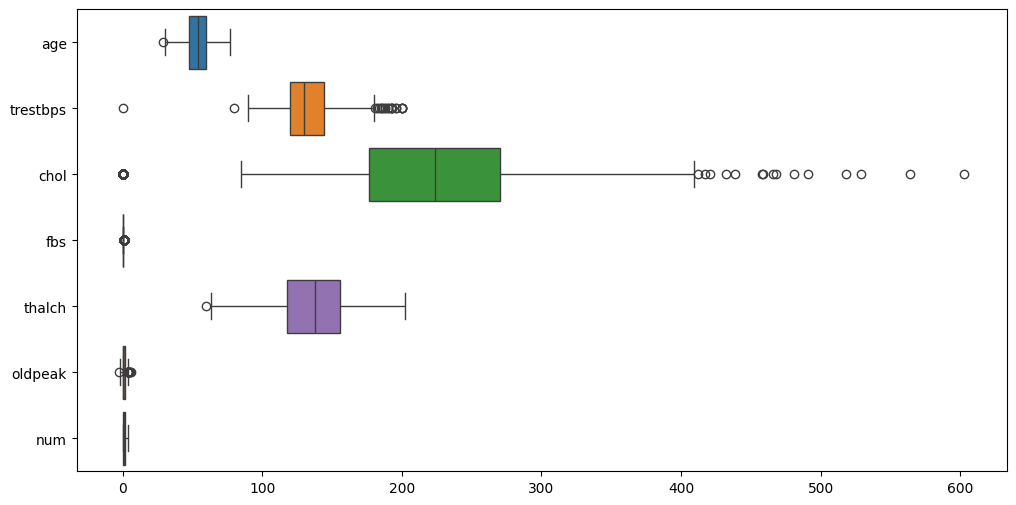

In [311]:
# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient="h")
plt.show()

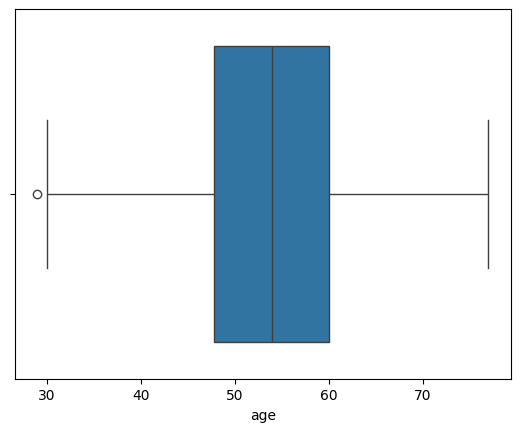

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers using boxplots for numerical features
sns.boxplot(x=data['age'])
plt.show()


**Visualize the distribution of features, including histograms, box plots, and correlation matrices.**

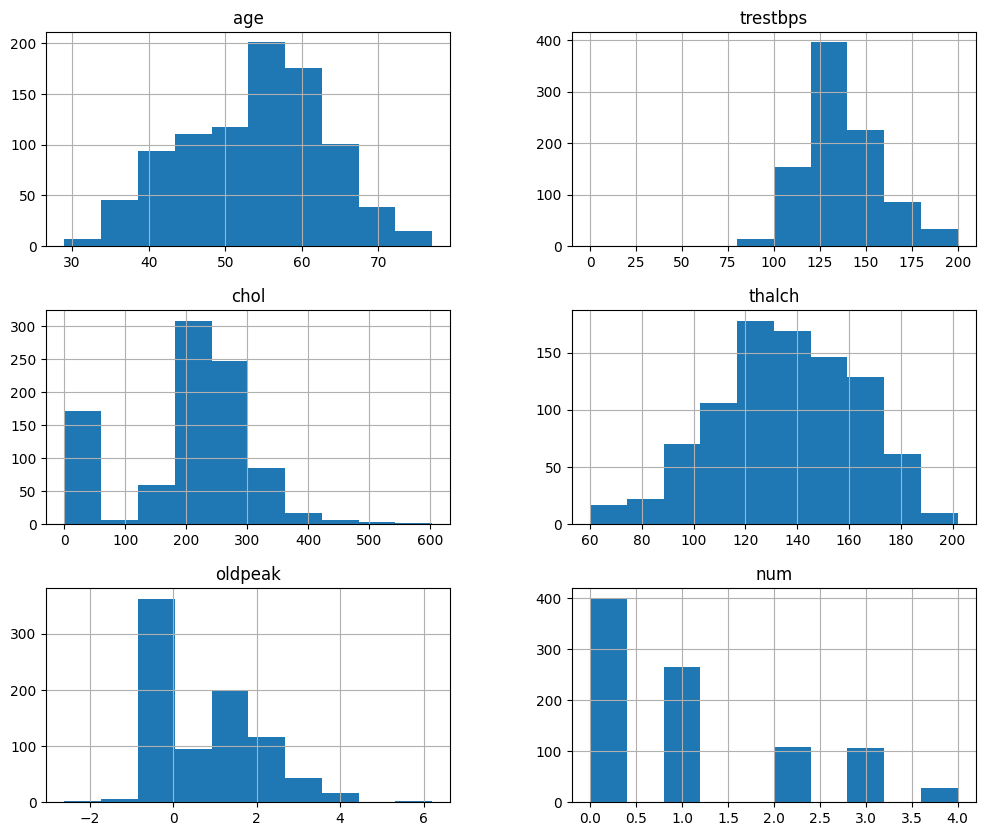

In [313]:
# Visualizing the distribution of numerical features using histograms
data.hist(figsize=(12, 10))
plt.show()

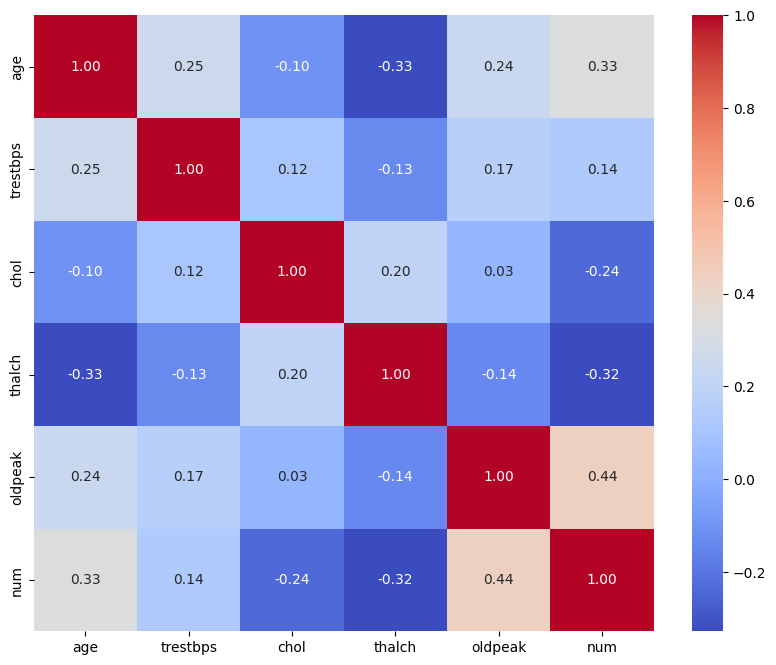

In [314]:
# Visualizing the correlation matrix
numerical_data = data.select_dtypes(include=np.number)  # Select only numerical columns
correlation_matrix = numerical_data.corr()  # Calculate correlation on numerical data
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [315]:
data


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


# **3. Feature Engineering:**

In [316]:

# Handle missing values (if any). Here, we drop rows with missing values for simplicity

data = data.dropna()

In [317]:
# Encoding categorical variables
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])
data['fbs'] = encoder.fit_transform(data['fbs'])
data['exang'] = encoder.fit_transform(data['exang'].astype(str))  # Convert 'exang' to string before encoding
data['restecg'] = encoder.fit_transform(data['restecg'])
data['slope'] = encoder.fit_transform(data['slope'])
data['thal'] = encoder.fit_transform(data['thal'])
# Encoding 'cp' (chest pain type)
data['cp'] = encoder.fit_transform(data['cp'].astype(str))  # Convert to string before encoding


<ipython-input-317-684b87fdfc22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'] = encoder.fit_transform(data['sex'])
<ipython-input-317-684b87fdfc22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fbs'] = encoder.fit_transform(data['fbs'])
<ipython-input-317-684b87fdfc22>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [327]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,2,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,1,0,110,0,1,1,92,1,0.0,1,0,4
902,62,1,0,160,254,1,2,108,2,3.0,1,1,4
903,53,1,0,125,0,0,1,120,1,1.5,2,2,4
904,62,1,0,166,170,0,2,120,2,3.0,1,2,4


In [318]:
# Splitting features and target variable
X = data.drop('num', axis=1)  # Features (exclude target column)
y = data['num']  # Target variable


**Scaling numeric features**

In [319]:
# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **4. Decision Tree Classification:**

**Split the dataset into training and testing sets (e.g., using an 80-20 split).**

In [320]:
# 4. Decision Tree Classification
# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).**

In [321]:
# Initializing the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Training the model
dt_classifier.fit(X_train, y_train)

# Making predictions
y_pred_proba = dt_classifier.predict_proba(X_test)

# **5.Hyperparameter Tuning:**

In [322]:
# Here, we can tune hyperparameters like max_depth, min_samples_split, and criterion.
# For simplicity, we will use the default decision tree first and later optimize it.
dt_classifier_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=10, criterion='entropy', random_state=42)
dt_classifier_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=42)

# **6. Model Evaluation and Analysis:**

In [323]:
# Evaluate the performance of the model
# y_pred was not defined, but y_pred_proba was. y_pred is derived using predict
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Add average='weighted'
recall = recall_score(y_test, y_pred, average='weighted') # Add average='weighted'
f1 = f1_score(y_test, y_pred, average='weighted') # Add average='weighted'
#roc_auc = roc_auc_score(y_test, y_pred, average='weighted', multi_class='ovr') # Add average='weighted' and multi_class='ovr'
roc_auc = roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovr')  # Use y_pred_proba
# Print performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.57
Precision: 0.58
Recall: 0.57
F1-Score: 0.56
ROC-AUC: 0.70


**Analyse the performance of the Decision Tree model using the evaluation metrics obtained.**

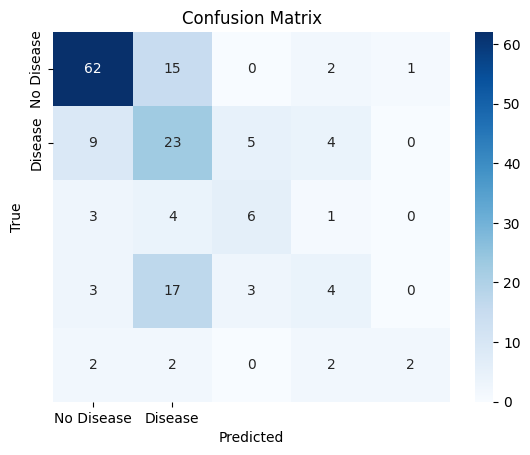

In [324]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [325]:
# Get unique class labels from the target variable
class_names = [str(c) for c in np.unique(y)]  # Convert unique classes to strings

**Visualize the decision tree structure to understand the rules learned by the model and identify important features**

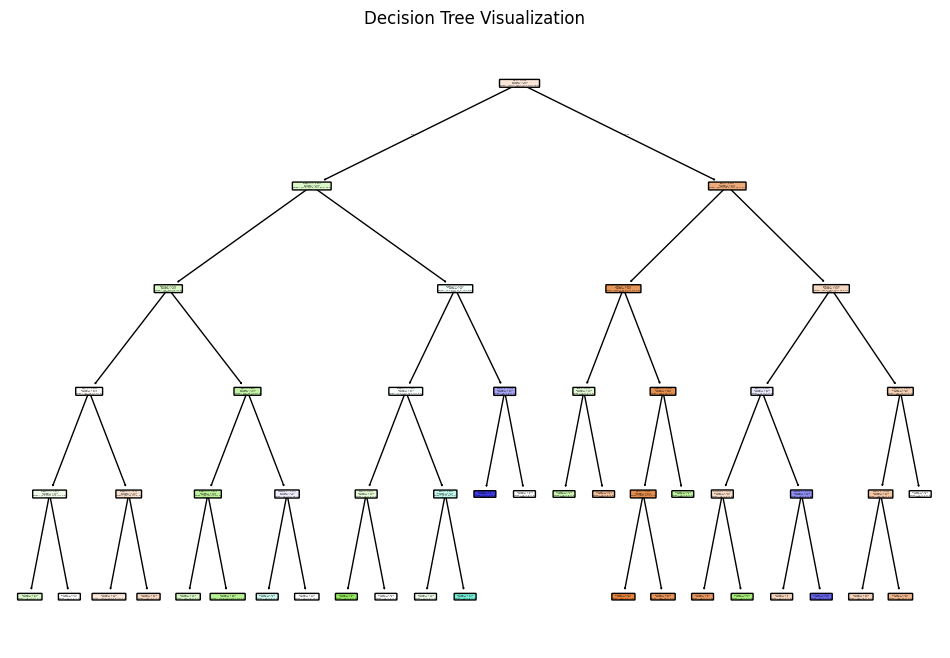

In [326]:
# Visualizing the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier_tuned, filled=True, feature_names=X.columns,
          class_names=class_names, rounded=True, proportion=False)  # Use the generated class names
plt.title("Decision Tree Visualization")
plt.show()

# **Interview Questions:**

**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

**Max Depth:** The maximum depth of the tree. Limiting depth prevents overfitting by making the tree simpler. A deeper tree might overfit the data.


**Min Samples Split:** The minimum number of samples required to split an internal node. Increasing this value makes the tree more conservative, which can help with overfitting.


**Criterion:** The function used to measure the quality of a split (e.g., "gini" for Gini impurity or "entropy" for information gain). It affects how the splits are made.

**Min Samples Leaf:** The minimum number of samples required to be at a leaf node. Increasing this value can help in avoiding overfitting by making the leaves more general.

**2. What is the difference between the Label encoding and One-hot encoding?**

**Label Encoding:** Converts categorical labels into numeric values. For example, ['low', 'medium', 'high'] becomes [0, 1, 2]. It's best used when the categories have an ordinal relationship.

**One-Hot Encoding:** Creates binary columns for each category. For example, for a color column with values ['red', 'green', 'blue'], it creates three columns: red, green, and blue, with binary values. It avoids creating artificial relationships between categories and is typically used for nominal (non-ordinal) variables.